<a href="https://colab.research.google.com/github/talitacgs/Data-CafeemSP/blob/main/CafeSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install basedosdados==1.6.5-b4 

# Importando Bibliotecas 

In [137]:
import basedosdados as db
from matplotlib import pyplot as plt
import numpy as np

# Carregamento de Base de Dados [SP]

In [139]:
query =" SELECT ano, sigla_uf,id_municipio, producao_cafe,area_cafe,valor_total_producao_cafe,producao_total_arroz,producao_total_feijao,producao_total_milho,producao_total_mandioca,producao_total_soja,producao_total_algodao,producao_total_cana,producao_total_trigo FROM `basedosdados.br_ibge_censo_agropecuario.municipio` WHERE sigla_uf = 'SP'"

df_sp = db.read_sql(query = query, billing_project_id='YOUR_ID')
df_sp

Downloading: 100%|██████████| 2501/2501 [00:00<00:00, 3577.23rows/s]


,ano,sigla_uf,id_municipio,producao_cafe,area_cafe,valor_total_producao_cafe,producao_total_arroz,producao_total_feijao,producao_total_milho,producao_total_mandioca,producao_total_soja,producao_total_algodao,producao_total_cana,producao_total_trigo
0,1985,SP,3500105,5054.0,748.0,38004.0,101.59,3390.57,68.478,0.0,972.487,NaN,0.0,421.0
1,1996,SP,3500105,NaN,248.0,37793.0,115.00,184.00,52.000,0.0,66.000,23.0,0.0,NaN
2,2006,SP,3500105,512.0,111.0,28651.0,NaN,0.00,0.000,NaN,0.000,0.0,54.0,202.0
3,2017,SP,3500105,108.0,95.0,390.0,7.00,0.00,0.000,11051.0,0.000,0.0,10.0,17.0
4,1985,SP,3500204,1590.0,62.0,9778.0,592.52,9054.72,0.000,0.0,0.000,0.0,0.0,369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2006,SP,3557204,24.0,5.0,3134.0,0.00,0.00,0.000,648545.4,0.000,0.0,0.0,258.0
2497,2017,SP,3557204,0.0,0.0,0.0,0.00,955.00,0.000,1590.0,0.000,0.0,0.0,6.0
2498,1996,SP,3557303,0.0,0.0,1572.0,0.00,31.00,4.000,0.0,0.000,0.0,0.0,NaN
2499,2006,SP,3557303,0.0,2.0,2377.0,3547.10,0.00,0.000,19250.0,0.000,0.0,0.0,1460.0


In [140]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ano                        2501 non-null   Int64  
 1   sigla_uf                   2501 non-null   object 
 2   id_municipio               2501 non-null   object 
 3   producao_cafe              2449 non-null   float64
 4   area_cafe                  2486 non-null   float64
 5   valor_total_producao_cafe  2501 non-null   float64
 6   producao_total_arroz       2243 non-null   float64
 7   producao_total_feijao      2362 non-null   float64
 8   producao_total_milho       2458 non-null   float64
 9   producao_total_mandioca    2368 non-null   float64
 10  producao_total_soja        2403 non-null   float64
 11  producao_total_algodao     2432 non-null   float64
 12  producao_total_cana        2491 non-null   float64
 13  producao_total_trigo       1996 non-null   float

In [141]:
#Verificando dados faltantes
df_sp.isna().sum()

ano                            0
sigla_uf                       0
id_municipio                   0
producao_cafe                 52
area_cafe                     15
valor_total_producao_cafe      0
producao_total_arroz         258
producao_total_feijao        139
producao_total_milho          43
producao_total_mandioca      133
producao_total_soja           98
producao_total_algodao        69
producao_total_cana           10
producao_total_trigo         505
dtype: int64

In [142]:
df_sp.describe()

,ano,producao_cafe,area_cafe,valor_total_producao_cafe,producao_total_arroz,producao_total_feijao,producao_total_milho,producao_total_mandioca,producao_total_soja,producao_total_algodao,producao_total_cana,producao_total_trigo
count,2501.000000,2449.000000,2486.000000,2501.000000,2243.000000,2362.000000,2458.000000,2.368000e+03,2403.000000,2.432000e+03,2491.000000,1996.000000
mean,2001.441423,493.161048,98.798874,14570.059576,249.841334,1329.754947,142.980055,7.894152e+04,160.024786,3.432515e+04,103.556918,369.962075
std,11.692368,1323.345555,430.158850,20405.356044,3248.239166,4181.249877,1254.533898,3.807148e+05,1107.488752,1.913438e+05,1241.758183,1139.281702
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1996.000000,0.000000,0.000000,199.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.000000
50%,2006.000000,16.917000,7.500000,7129.000000,8.820000,29.000000,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,55.000000
75%,2017.000000,291.000000,56.000000,20468.000000,51.197500,543.555000,8.787500,5.187500e+03,0.000000,2.700000e+01,2.000000,315.500000
max,2017.000000,16431.000000,8285.000000,204306.000000,110708.300000,69412.260000,31473.270000,6.312504e+06,25827.440000,3.284242e+06,37643.450000,22619.000000


# Tratamento dos Dados [SP]

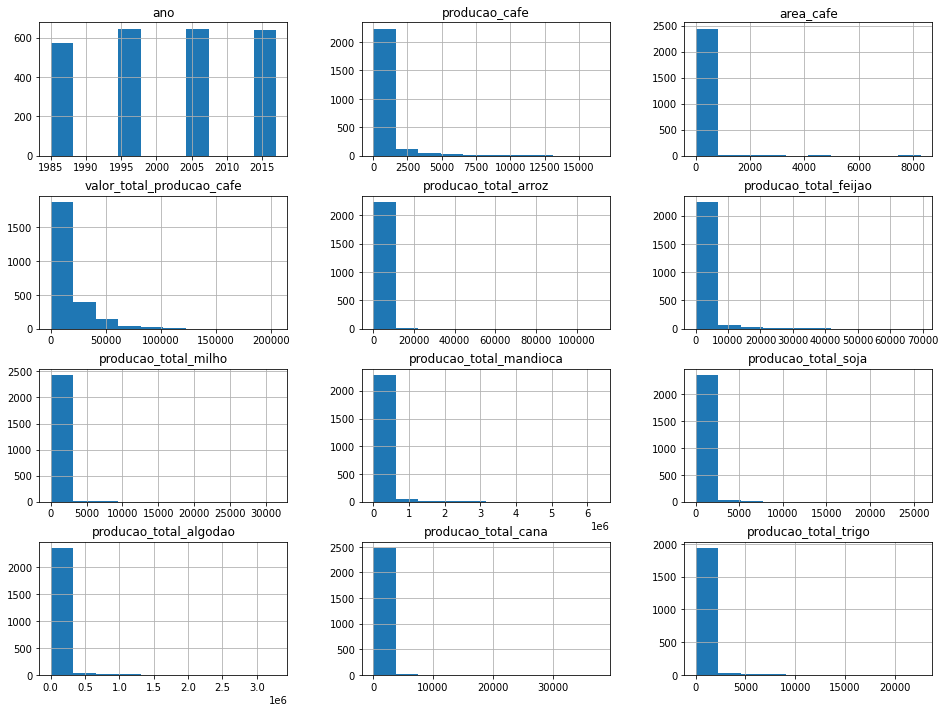

In [143]:
# Histograma para avaliar distribuição dos dados
fig = plt.figure(figsize = (16,12))
ax = fig.gca()
df_sp.hist(ax=ax)
plt.show()

In [145]:
# Contar quantidade de zeros, de NA e sua representações na amostra
for column_name in df_sp.columns:
    column = df_sp[column_name]
    # Quantidade de zeros 
    contar_zero = (column == 0).sum()
    # Tamanho da amostra
    tamanho = len(column)
    # % de zero na amostra
    porcent_zero = round(contar_zero/tamanho,2) * 100
    # Quantidade de NA
    is_na = column.isna().sum()
    # % de NA na amostra
    porcent_isna = round(is_na/tamanho,2) * 100

    try:
      mean = round(column.mean(),2)
    except:
      mean = "An exception occurred"

    print(column_name)
    print(f'Count of zeros is : {contar_zero} This represents {porcent_zero} % of length.')
    print(f'Count of is not a number: {is_na} This represents {porcent_isna} % of length.')
    print(f'Mean in {column_name} is : {mean} \n')


ano
Count of zeros is : 0 This represents 0.0 % of length.
Count of is not a number: 0 This represents 0.0 % of length.
Mean in ano is : 2001.44 

sigla_uf
Count of zeros is : 0 This represents 0.0 % of length.
Count of is not a number: 0 This represents 0.0 % of length.
Mean in sigla_uf is : An exception occurred 

id_municipio
Count of zeros is : 0 This represents 0.0 % of length.
Count of is not a number: 0 This represents 0.0 % of length.
Mean in id_municipio is : inf 

producao_cafe
Count of zeros is : 925 This represents 37.0 % of length.
Count of is not a number: 52 This represents 2.0 % of length.
Mean in producao_cafe is : 493.16 

area_cafe
Count of zeros is : 772 This represents 31.0 % of length.
Count of is not a number: 15 This represents 1.0 % of length.
Mean in area_cafe is : 98.8 

valor_total_producao_cafe
Count of zeros is : 477 This represents 19.0 % of length.
Count of is not a number: 0 This represents 0.0 % of length.
Mean in valor_total_producao_cafe is : 14570.0

In [149]:
# Na maior parte das Colunas, a %NA não ultrapassa 10%, então substituir pela média não enviesará os resultado
#Calculo da média
mean_prod_cafe = df_sp["producao_cafe"].mean()
mean_area_cafe = df_sp["area_cafe"].mean()
mean_prod_arroz = df_sp["producao_total_arroz"].mean()
mean_prod_feijao = df_sp["producao_total_feijao"].mean()
mean_prod_milho = df_sp["producao_total_milho"].mean()
mean_prod_mandioca = df_sp["producao_total_mandioca"].mean()
mean_prod_soja = df_sp["producao_total_soja"].mean()
mean_prod_algodao = df_sp["producao_total_algodao"].mean()
mean_prod_cana = df_sp["producao_total_cana"].mean()

#Substituição
df_sp["producao_cafe"].fillna(mean_prod_cafe, inplace=True)
df_sp["area_cafe"].fillna(mean_area_cafe, inplace=True)
df_sp["producao_total_arroz"].fillna(mean_prod_arroz, inplace=True)
df_sp["producao_total_feijao"].fillna(mean_prod_feijao, inplace=True)
df_sp["producao_total_milho"].fillna(mean_prod_milho, inplace=True)
df_sp["producao_total_mandioca"].fillna(mean_prod_mandioca, inplace=True)
df_sp["producao_total_soja"].fillna(mean_prod_soja, inplace=True)
df_sp["producao_total_algodao"].fillna(mean_prod_algodao, inplace=True)
df_sp["producao_total_cana"].fillna(mean_prod_cana, inplace=True)

df_sp.isna().sum()

ano                            0
sigla_uf                       0
id_municipio                   0
producao_cafe                  0
area_cafe                      0
valor_total_producao_cafe      0
producao_total_arroz           0
producao_total_feijao          0
producao_total_milho           0
producao_total_mandioca        0
producao_total_soja            0
producao_total_algodao         0
producao_total_cana            0
producao_total_trigo         505
dtype: int64

In [150]:
# Como 20% dos dados de Produção de Trigo são NA, chamou a atenção para o fato
# que talvez o censo se um dos anos não estivesse devidamente preenchido

# Dataframe por ano
df_sp_1985 = df_sp[df_sp["ano"] == 1985]
df_sp_1996 = df_sp[df_sp["ano"] == 1996]
df_sp_2006 = df_sp[df_sp["ano"] == 2006]
df_sp_2017 = df_sp[df_sp["ano"] == 2017]

isna_trigo_85 = df_sp_1985["producao_total_trigo"].isna().sum()
isna_trigo_96 = df_sp_1996["producao_total_trigo"].isna().sum()
isna_trigo_06 = df_sp_2006["producao_total_trigo"].isna().sum()
isna_trigo_17 = df_sp_2017["producao_total_trigo"].isna().sum()

print(f"Quantidade de dados faltantes da produção de trigo no censo de 1985: {isna_trigo_85}")
print(f"Quantidade de dados faltantes da produção de trigo no censo de 1996: {isna_trigo_96}")
print(f"Quantidade de dados faltantes da produção de trigo no censo de 2006: {isna_trigo_06}")
print(f"Quantidade de dados faltantes da produção de trigo no censo de 2017: {isna_trigo_17}")


Quantidade de dados faltantes da produção de trigo no censo de 1985: 0
Quantidade de dados faltantes da produção de trigo no censo de 1996: 500
Quantidade de dados faltantes da produção de trigo no censo de 2006: 0
Quantidade de dados faltantes da produção de trigo no censo de 2017: 5


In [151]:
# Como os dados faltantes se concentram no censo de 1996, 
# optou-se por preencher os demais com a media do respectivo ano 
# e não trabalhar com os dados de produção de trigo de 1996, pois as aproximações poderiam enviesar os resultados

mean_prod_trigo_17 = df_sp_2017["producao_total_trigo"].mean()
df_sp_2017["producao_total_trigo"].fillna(mean_prod_trigo_17, inplace=True)

df_sp_2017.isna().sum()

ano                          0
sigla_uf                     0
id_municipio                 0
producao_cafe                0
area_cafe                    0
valor_total_producao_cafe    0
producao_total_arroz         0
producao_total_feijao        0
producao_total_milho         0
producao_total_mandioca      0
producao_total_soja          0
producao_total_algodao       0
producao_total_cana          0
producao_total_trigo         0
dtype: int64

# Visualização de Dados [SP]

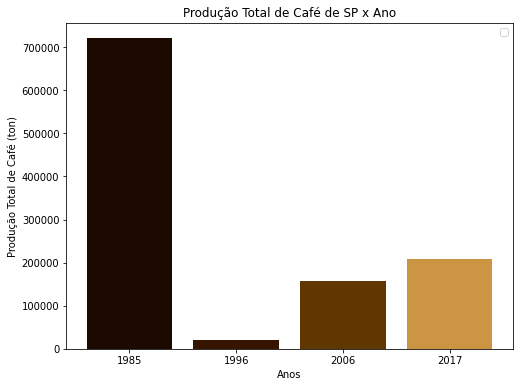

In [154]:
# Gráfico de Produção Total de Café no Estado de São Paulo nos últimos Censos

bar_distance = 1
anos = [1985,1996,2006,2017]

#Tamanho do gráfico
plt.figure(figsize=(8,6))

#Posição das barras
x1 = np.arange(1)
x2 = [x + bar_distance  for x in x1 ]
x3 = [x + bar_distance for x in x2 ]
x4 = [x + bar_distance for x in x3 ]

# Criação das barras
plt.bar(x1,height=[df_sp_1985["producao_cafe"].sum()], color = '#1C0A00')
plt.bar(x2,height=[df_sp_1996["producao_total_arroz"].sum()], color = '#361500')
plt.bar(x3,height=[df_sp_2006["producao_cafe"].sum()], color = '#603601')
plt.bar(x4,height=[df_sp_2017["producao_cafe"].sum()], color = '#CC9544')
plt.xticks([r for r in range(len(anos))], ['1985','1996','2006','2017'])

#Legendas
plt.title('Produção Total de Café de SP x Ano')
plt.xlabel('Anos')
plt.ylabel('Produção Total de Café (ton)')

plt.legend()
plt.show()

In [155]:
# Avaliação do Valor em reais da produção ao longo dos anos

valor_prod_cafe_85 = round(df_sp_1985["valor_total_producao_cafe"].sum(),2)
valor_prod_cafe_96 = round(df_sp_1996["valor_total_producao_cafe"].sum(),2)
valor_prod_cafe_06 = round(df_sp_2006["valor_total_producao_cafe"].sum(),2)
valor_prod_cafe_17 = round(df_sp_2017["valor_total_producao_cafe"].sum(),2)

porcentagem_prod = round(valor_prod_cafe_17/valor_prod_cafe_85,2) * 100

print(f"A produção de café de 1985 era estimada em R$ {valor_prod_cafe_85} reais")
print(f"A produção de café de 1996 era estimada em R$ {valor_prod_cafe_96} reais")
print(f"A produção de café de 2006 era estimada em R$ {valor_prod_cafe_06} reais")
print(f"A produção de café de 2017 era estimada em R$ {valor_prod_cafe_17} reais, isso representa {porcentagem_prod} % do valor da produção de 1985")

A produção de café de 1985 era estimada em R$ 12210369.0 reais
A produção de café de 1996 era estimada em R$ 12306790.0 reais
A produção de café de 2006 era estimada em R$ 10505925.0 reais
A produção de café de 2017 era estimada em R$ 1416635.0 reais, isso representa 12.0 % do valor da produção de 1985


In [157]:
# Mas se o café não é mais a principal cultura agrícola, qual outro produto pode ser ?
# Investigação de qual produção agrícola mais representa SP no último censo (2017).

prod_cafe = round(df_sp_2017["producao_cafe"].sum(),2)
prod_arroz = round(df_sp_2017["producao_total_arroz"].sum(),2)
prod_feijao = round(df_sp_2017["producao_total_feijao"].sum(),2)
prod_milho = round(df_sp_2017["producao_total_milho"].sum(),2)
prod_mandioca = round(df_sp_2017["producao_total_mandioca"].sum(),2)
prod_soja = round(df_sp_2017["producao_total_soja"].sum(),2)
prod_algodao = round(df_sp_2017["producao_total_algodao"].sum(),2)
prod_cana = round(df_sp_2017["producao_total_cana"].sum(),2)
prod_trigo = round(df_sp_2017["producao_total_trigo"].sum(),2)


print(f"A produção de café é de {prod_cafe} tons")
print(f"A produção de arroz é de {prod_arroz} tons")
print(f"A produção de feijao é de {prod_feijao} tons")
print(f"A produção de milho é de {prod_milho} tons")
print(f"A produção de mandioca é de {prod_mandioca} tons")
print(f"A produção de soja é de {prod_soja} tons")
print(f"A produção de algodao é de {prod_algodao} tons")
print(f"A produção de cana é de {prod_cana} tons")
print(f"A produção de trigo é de {prod_trigo} tons")

total_prod = prod_cafe + prod_arroz + prod_feijao + prod_milho + prod_mandioca + prod_soja + prod_algodao + prod_cana + prod_trigo
porcentagem_cafe = round(prod_cafe/total_prod,2) * 100
porcentagem_mandioca = round(prod_mandioca/total_prod,2) * 100

print(f"O café representa {porcentagem_cafe} % da produção analisada")
print(f"A mandioca é o maior produto agrícola produzido com cerca de {porcentagem_mandioca} % de participação")

A produção de café é de 207426.42 tons
A produção de arroz é de 90607.21 tons
A produção de feijao é de 715251.77 tons
A produção de milho é de 78345.9 tons
A produção de mandioca é de 5034487.61 tons
A produção de soja é de 101511.12 tons
A produção de algodao é de 171988.74 tons
A produção de cana é de 7001.78 tons
A produção de trigo é de 20319.75 tons
O café representa 3.0 % da produção analisada
A mandioca é o maior produto agrícola produzido com cerca de 78.0 % de participação


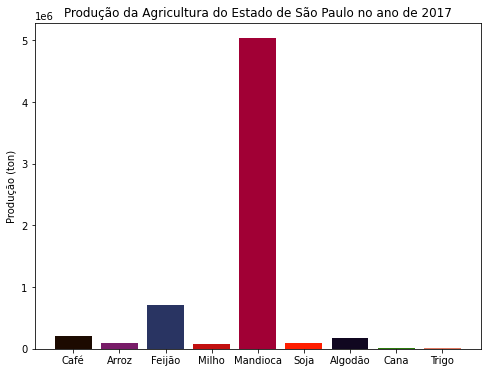

In [136]:
bar_distance = 1
produtos = ['Café','Arroz','Feijão','Milho', 'Mandioca', 'Soja', 'Algodão','Cana','Trigo']

#Tamanho do gráfico
plt.figure(figsize=(8,6))

#Posição das barras
x1 = np.arange(1)
x2 = [x + bar_distance  for x in x1 ]
x3 = [x + bar_distance for x in x2 ]
x4 = [x + bar_distance for x in x3 ]
x5 = [x + bar_distance for x in x4 ]
x6 = [x + bar_distance for x in x5 ]
x7 = [x + bar_distance for x in x6 ]
x8 = [x + bar_distance for x in x7 ]
x9 = [x + bar_distance for x in x8 ]

# Criação das barras
plt.bar(x1,height=[df_sp_2017["producao_cafe"].sum()], color = '#1C0A00')
plt.bar(x2,height=[df_sp_2017["producao_total_arroz"].sum()], color = '#781C68')
plt.bar(x3,height=[df_sp_2017["producao_total_feijao"].sum()], color = '#293462')
plt.bar(x4,height=[df_sp_2017["producao_total_milho"].sum()], color = '#C21010')
plt.bar(x5,height=[df_sp_2017["producao_total_mandioca"].sum()], color = '#A10035')
plt.bar(x6,height=[df_sp_2017["producao_total_soja"].sum()], color = '#FF1E00')
plt.bar(x7,height=[df_sp_2017["producao_total_algodao"].sum()], color = '#100720')
plt.bar(x8,height=[df_sp_2017["producao_total_cana"].sum()], color = '#2B7A0B')
plt.bar(x9,height=[df_sp_2017["producao_total_trigo"].sum()], color = '#DF7861')

plt.xticks([r for r in range(len(produtos))], ['Café','Arroz','Feijão','Milho', 'Mandioca', 'Soja', 'Algodão','Cana','Trigo'])

#Legendas
plt.title('Produção da Agricultura do Estado de São Paulo no ano de 2017')
plt.ylabel('Produção (ton)')

plt.show()